<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml04_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris 데이터셋 분류

Setosa/Versicolor/Virginica 분류 - 다중 클래스 분류 문제

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  # load_iris() 함수를 사용하기 위해서
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 표준화 특성 스케일링
from sklearn.neighbors import KNeighborsClassifier  # KNN 모델
from sklearn.metrics import confusion_matrix, classification_report  # 평가 지표

# Iris 데이터셋 준비

In [2]:
iris = datasets.load_iris()

In [5]:
print(type(iris))  #> Bunch 클래스 타입

<class 'sklearn.utils._bunch.Bunch'>


scikit-learn 패키지의 Bunch 클래스:
*   Python의 dict와 비슷한 클래스
*   key-value 쌍으로 아이템들을 저장하고 있음.
*   `bunch_name['key']` 또는 `bunch_name.key` 형식으로 key를 사용해서 value(값)을 참조할 수 있음.

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
x = iris.data  # x = iris['data'], 특성 배열(feature array)

In [12]:
y = iris.target  # iris['target'], 타겟 배열(target array)

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
x, y = datasets.load_iris(return_X_y=True)
#> 특성 배열(x), 타겟 배열(y)를 리턴.

In [20]:
iris_df = datasets.load_iris(as_frame=True)
#> 데이터, 타겟을 DataFrame 타입으로 생성한 Bunch 객체를 리턴.

In [22]:
print(type(iris_df))

<class 'sklearn.utils._bunch.Bunch'>


In [23]:
iris_df.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
iris_df.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# 데이터 탐색

In [26]:
x[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [27]:
x.shape  #> (n_samples, n_features)

(150, 4)

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
y[:6]

array([0, 0, 0, 0, 0, 0])

In [30]:
y.shape  # (n_samples,)

(150,)

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
# 타겟의 비율
pd.Series(y).value_counts()

,count
0,50
1,50
2,50


# 훈련 셋, 테스트 셋 분리

train:test = 8:2, 층화 추출.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [35]:
x_train.shape

(120, 4)

In [36]:
x_test.shape

(30, 4)

In [37]:
y_train.shape

(120,)

In [38]:
pd.Series(y_train).value_counts()

,count
0,40
2,40
1,40


In [39]:
y_test.shape

(30,)

In [40]:
pd.Series(y_test).value_counts()

,count
0,10
2,10
1,10


# 전처리(표준화 특성 스케일링)

In [41]:
std_scaler = StandardScaler()  # StandardScaler 객체 생성

In [42]:
x_tr_scaled = std_scaler.fit_transform(X=x_train)
#> fit_transform(): fit() 메서드 호출 후 찾은 평균과 표준편차를 사용해서 transform()까지 호출.
#> (주의) fit_transform() 메서드는 훈련 셋만 아규먼트로 전달. 테스트 셋에서는 사용하면 안됨!

In [43]:
x_tr_scaled[:6]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575],
       [ 0.54731923, -1.22765467,  0.69841284,  0.91510102]])

In [44]:
x_te_scaled = std_scaler.transform(X=x_test)
# 테스트 셋을 스케일링할 때는 fit 또는 fit_transform은 사용하면 안됨! transform만 사용!

In [46]:
x_te_scaled[:6]

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558],
       [ 0.54731923,  0.56345245,  0.52806825,  0.52009339]])

# KNN 모델 생성, 훈련, 평가

In [47]:
knn = KNeighborsClassifier()  # KNN 모델 생성

In [48]:
knn.fit(X=x_tr_scaled, y=y_train)  # KNN 모델 훈련

KNeighborsClassifier()

In [49]:
train_pred = knn.predict(X=x_tr_scaled)  # 훈련 셋 예측값

In [50]:
train_pred[:10]

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2])

In [51]:
y_train[:10]

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2])

In [52]:
knn.score(X=x_tr_scaled, y=y_train)

0.975

In [53]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=train_pred)
conf_mat

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

레이블이 1인 샘플을 레이블 2로 잘못 예측한 것이 1개,
레이블이 2인 샘플을 레이블 1로 잘못 예측한 것이 2개.

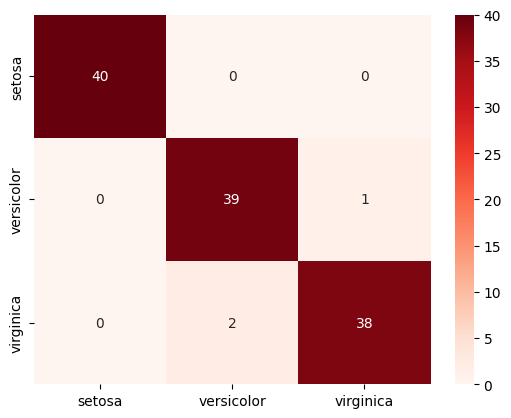

In [58]:
# 혼동 행렬(confusion matrix) 시각화
sns.heatmap(data=conf_mat, cmap='Reds', annot=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [59]:
print(classification_report(y_true=y_train, y_pred=train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [62]:
test_pred = knn.predict(X=x_te_scaled)  # 테스트 셋의 예측값
test_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 0])

In [63]:
y_test  # 테스트 셋의 실젯값

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [64]:
knn.score(X=x_te_scaled, y=y_test)  # 테스트 셋 정확도

0.9333333333333333

In [65]:
conf_mat_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
conf_mat_test

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

실제 레이블이 2(virginica)인 샘플을 레이블이 1(versicolor)로 잘못 예측한 것이 2개.

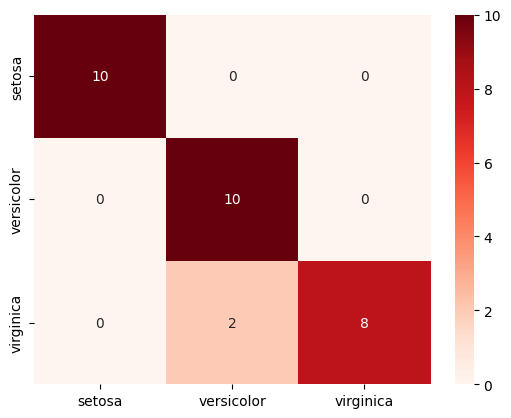

In [67]:
sns.heatmap(data=conf_mat_test, cmap='Reds', annot=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

In [68]:
print(classification_report(y_true=y_test, y_pred=test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# k값의 따른 정확도의 변화

In [70]:
k_values = np.arange(1, 100)
train_accs = []  # 훈련 셋에서의 정확도를 저장할 리스트
test_accs = []  # 테스트 셋에서의 정확도를 저장할 리스트

for k in k_values:  # k값을 1부터 99까지 변화
    knn = KNeighborsClassifier(n_neighbors=k)  # KNN 모델 생성
    knn.fit(X=x_tr_scaled, y=y_train)  # KNN 모델 훈련
    tr_acc = knn.score(X=x_tr_scaled, y=y_train)  # 훈련 셋 정확도
    train_accs.append(tr_acc)
    te_acc = knn.score(X=x_te_scaled, y=y_test)  # 테스트 셋 정확도
    test_accs.append(te_acc)

print(train_accs)
print(test_accs)

[1.0, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.975, 0.9583333333333334, 0.975, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9416666666666667, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9333333333333333, 0.9333333333333333, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9, 0.8916666666666667, 0.8916666666666667, 0.8833333333333333, 0.875, 0.8833333333333333, 0.8833333333333333, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.875, 0.8916666666666667, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333, 0.8833333333333333, 0.875, 0.875, 0.875, 0

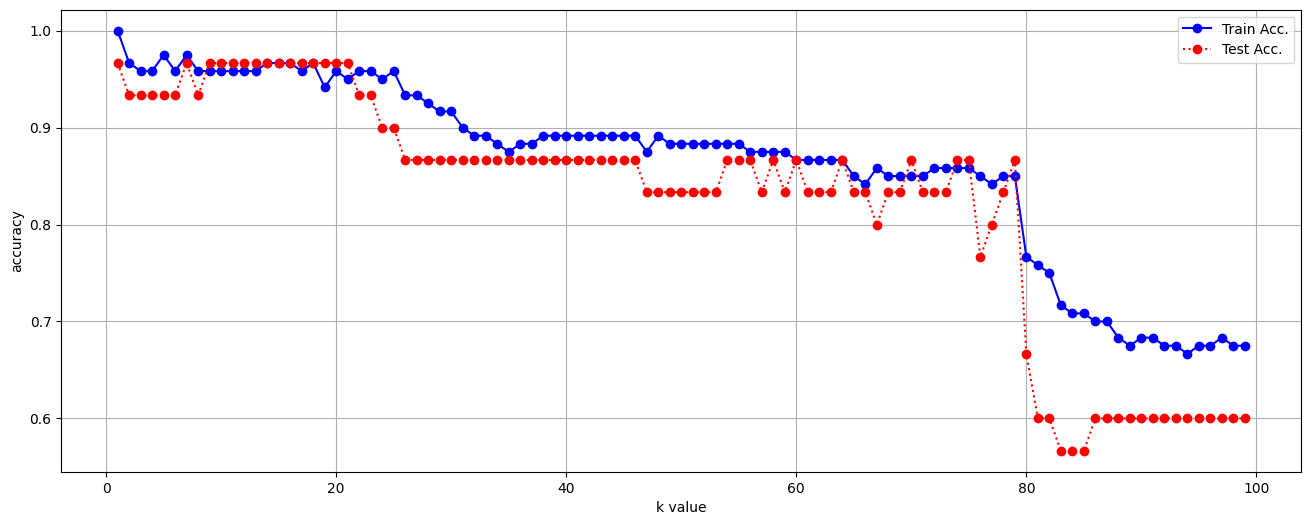

In [77]:
plt.figure(figsize=(16, 6))

# 훈련 셋의 정확도 시각화
plt.plot(k_values, train_accs, 'bo-', label='Train Acc.')

# 테스트 셋의 정확도 시각화
plt.plot(k_values, test_accs, 'ro:', label='Test Acc.')

plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

*   과(대)적합: over-fitting. 훈련 셋에서의 정확도가 테스트 셋에서의 정확도보다 큰 경우.
*   과소적합: under-fitting. 훈련 셋에서의 정확도가 테스트 셋에서의 정확도보다 작은 경우.
*   지도학습에서는 일반적으로 과대적합이 일어나기가 쉬움.
    *   좋은 머신 러닝 모델은 과대적합의 크기가 작은 경우. 훈련 셋의 정확도와 테스트 셋의 정확도 차이가 작은 경우.
*   과소적합은 샘플의 개수가 적은 경우에 잘 나타남.
    *   과소적합을 줄이기 위해서는 샘플들을 더 많이 수집.

# Breast Cancer 데이터셋

In [78]:
cancer = datasets.load_breast_cancer()

In [79]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [80]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [81]:
x = cancer.data  # 특성 배열
y = cancer.target  # 타겟 배열

In [82]:
x.shape  #> (569, 30) = (n_sample, n_features)

(569, 30)

In [83]:
y.shape  #> (569,) =(n_sample,)

(569,)

In [84]:
x[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [85]:
y[:5]

array([0, 0, 0, 0, 0])

In [87]:
pd.Series(y).value_counts().sort_index()

,count
0,212
1,357


breast cancer 데이터의 클래스
*   0 - Malignant. 양성. 암.
*   1 - Benign. 음성. 암이 아님.

## 훈련 셋, 테스트 셋 분리

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [89]:
x_train.shape

(398, 30)

In [90]:
x_test.shape

(171, 30)

In [92]:
pd.Series(y_train).value_counts(normalize=True)

,proportion
1,0.628141
0,0.371859


In [93]:
pd.Series(y_test).value_counts(normalize=True)

,proportion
1,0.625731
0,0.374269


## 특성 스케일링

In [94]:
std_scaler = StandardScaler()

In [95]:
x_tr_scaled = std_scaler.fit_transform(X=x_train)

In [97]:
x_tr_scaled[:3]

array([[-0.70982078, -0.258417  , -0.63739619, -0.71199581,  1.62843044,
         0.84728866,  0.16650073,  0.19641954,  0.54271642,  1.3471506 ,
         0.07888449,  1.00097591,  0.14862676, -0.30247042,  2.51058541,
         0.35861242,  0.52155906,  1.08389476, -0.29885498,  0.48535309,
        -0.60006823, -0.06586747, -0.56566159, -0.62261349,  2.01922243,
         0.18620235,  0.18018746,  0.40093281, -0.41407439,  0.44522333],
       [-0.83033136,  2.2311266 , -0.87497994, -0.7790808 , -1.59756876,
        -1.26771706, -1.08647139, -1.24323171, -2.65854287, -1.05269949,
        -0.33760049,  4.98258297, -0.4296651 , -0.44954246,  0.20210656,
        -0.88251048, -0.96334097, -1.8171767 , -0.09058754, -0.69943637,
        -0.89736062,  1.97515343, -0.94957443, -0.7793308 , -1.74765214,
        -1.22937204, -1.25894675, -1.69278836, -2.09572345, -1.32341746],
       [-1.01109725, -0.22726989, -1.03517213, -0.91177961, -1.07777861,
        -1.0980963 , -0.84165046, -0.9557672 ,  2

In [98]:
x_te_scaled = std_scaler.transform(X=x_test)

## KNN 모델 생성, 훈련, 평가

In [99]:
knn = KNeighborsClassifier()  # KNN 모델 생성

In [100]:
knn.fit(X=x_tr_scaled, y=y_train)  # KNN 모델 훈련

KNeighborsClassifier()

In [101]:
train_pred = knn.predict(X=x_tr_scaled)  # 훈련 셋에서의 예측값

In [102]:
train_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [103]:
y_train[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [104]:
knn.score(X=x_tr_scaled, y=y_train)  # 훈련 셋 정확도

0.9723618090452262

In [105]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=train_pred)
conf_mat

array([[139,   9],
       [  2, 248]])

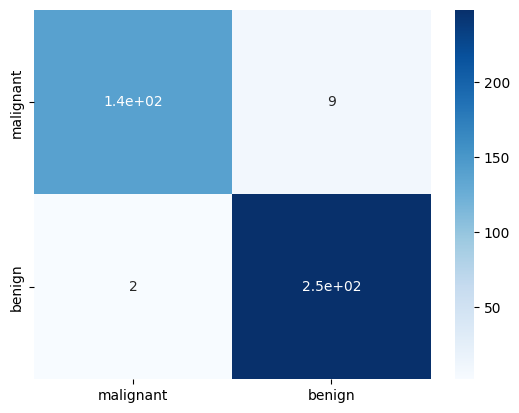

In [106]:
sns.heatmap(data=conf_mat, cmap='Blues', annot=True,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [107]:
print(classification_report(y_true=y_train, y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       148
           1       0.96      0.99      0.98       250

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [108]:
test_pred = knn.predict(X=x_te_scaled)  # 테스트 셋 예측값

In [109]:
test_pred[:10]

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [111]:
y_test[:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [112]:
conf_mat_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
conf_mat_test

array([[ 57,   7],
       [  0, 107]])

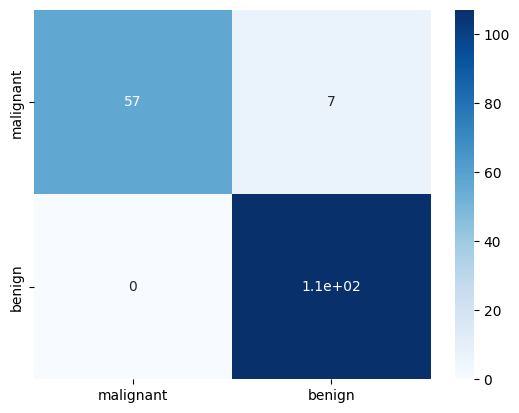

In [113]:
sns.heatmap(data=conf_mat_test, cmap='Blues', annot=True,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.show()

In [114]:
print(classification_report(y_true=y_test, y_pred=test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## 하이퍼 파라미터 튜닝(최적의 k값 찾기)

In [115]:
k_values = np.arange(1, 100)
train_accs = []
test_accs = []
for k in k_values:  # k=1~99 반복
    knn = KNeighborsClassifier(n_neighbors=k)  # KNN 모델 생성
    knn.fit(X=x_tr_scaled, y=y_train)  # KNN 모델 훈련
    train_accs.append(knn.score(X=x_tr_scaled, y=y_train))  # 훈련 셋 정확도 저장
    test_accs.append(knn.score(X=x_te_scaled, y=y_test))  # 테스트 셋 정확도 저장

In [116]:
print(train_accs)
print(test_accs)

[1.0, 0.9773869346733668, 0.9723618090452262, 0.9824120603015075, 0.9723618090452262, 0.9723618090452262, 0.9723618090452262, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9723618090452262, 0.9673366834170855, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9698492462311558, 0.9673366834170855, 0.9698492462311558, 0.964824120603015, 0.9623115577889447, 0.9623115577889447, 0.9623115577889447, 0.9673366834170855, 0.9673366834170855, 0.9673366834170855, 0.964824120603015, 0.964824120603015, 0.964824120603015, 0.9597989949748744, 0.9623115577889447, 0.9597989949748744, 0.9597989949748744, 0.957286432160804, 0.9547738693467337, 0.957286432160804, 0.9547738693467337, 0.9547738693467337, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.9522613065326633, 0.949748743718593, 0.949748743718593, 0.

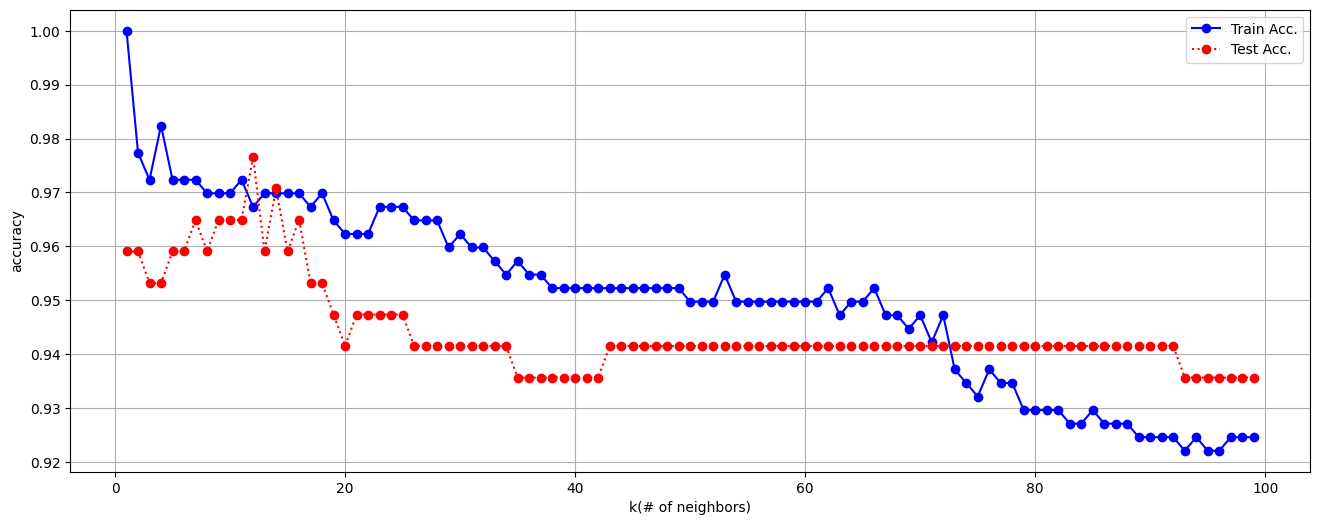

In [123]:
plt.figure(figsize=(16, 6))

# 훈련 셋 정확도 시각화
plt.plot(k_values, train_accs, 'bo-', label='Train Acc.')

# 테스트 셋 정확도 시각화
plt.plot(k_values, test_accs, 'ro:', label='Test Acc.')

plt.legend()
plt.grid()
plt.xlabel('k(# of neighbors)')
plt.ylabel('accuracy')
plt.show()

k=7일 때 일반화 성능

In [124]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X=x_tr_scaled, y=y_train)
train_pred = knn.predict(X=x_tr_scaled)
print(classification_report(y_true=y_train, y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       148
           1       0.97      0.99      0.98       250

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [126]:
test_pred = knn.predict(X=x_te_scaled)
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        64
      benign       0.95      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

